# E-commerce Customer Segmentation

## Context:

* A key challenge for e-commerce businesses is to analyze the trend in themarket to increase their sales. The trend can be easily observed if thecompanies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying different criteria likeprevious orders, mostly searched brands and so on.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To supress warnings

In [2]:
# Read the dataset
data = pd.read_excel("cust_data.xlsx")

In [3]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [5]:
data.duplicated().sum()

0

In [6]:
data.nunique()

Cust_ID                   30000
Gender                        2
Orders                       13
Jordan                       16
Gatorade                     13
Samsung                      20
Asus                         17
Udis                         13
Mondelez International       13
Wrangler                     10
Vans                         16
Fila                         15
Brooks                       10
H&M                          16
Dairy Queen                  24
Fendi                        14
Hewlett Packard              10
Pladis                       11
Asics                        25
Siemens                      11
J.M. Smucker                 27
Pop Chips                    17
Juniper                      29
Huawei                       16
Compaq                       19
IBM                           9
Burberry                     21
Mi                            9
LG                           13
Dior                         12
Scabal                       11
Tommy Hi

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [8]:
v1 = data['Gender'].value_counts()
v1

F    22054
M     5222
Name: Gender, dtype: int64

In [9]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [11]:
data.head(20)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  30000 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [82]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


## Exploratory Data Analysis


In [83]:
data.Gender.value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

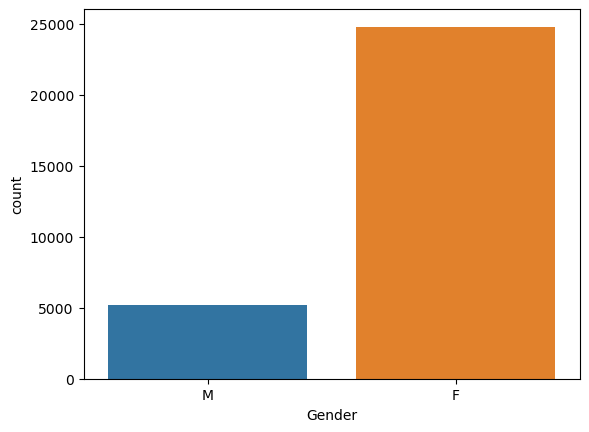

In [84]:
# Plot to check the count of male and female customers
sns.countplot(data=data,x='Gender')
plt.show()

* there is more female customer as compared to male

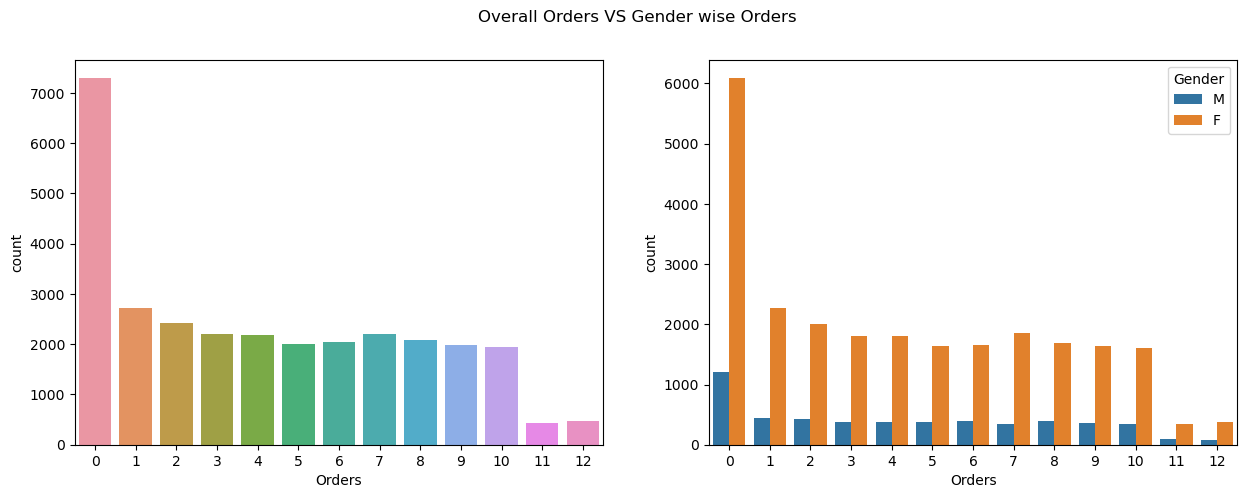

In [85]:
# Overall orders count
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x='Orders')

# Orders count by each gender
plt.subplot(1,2,2)
sns.countplot(data=data,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

* there is maximum numbers of female customer as comapre to male and she orderd maximum orders

In [86]:
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

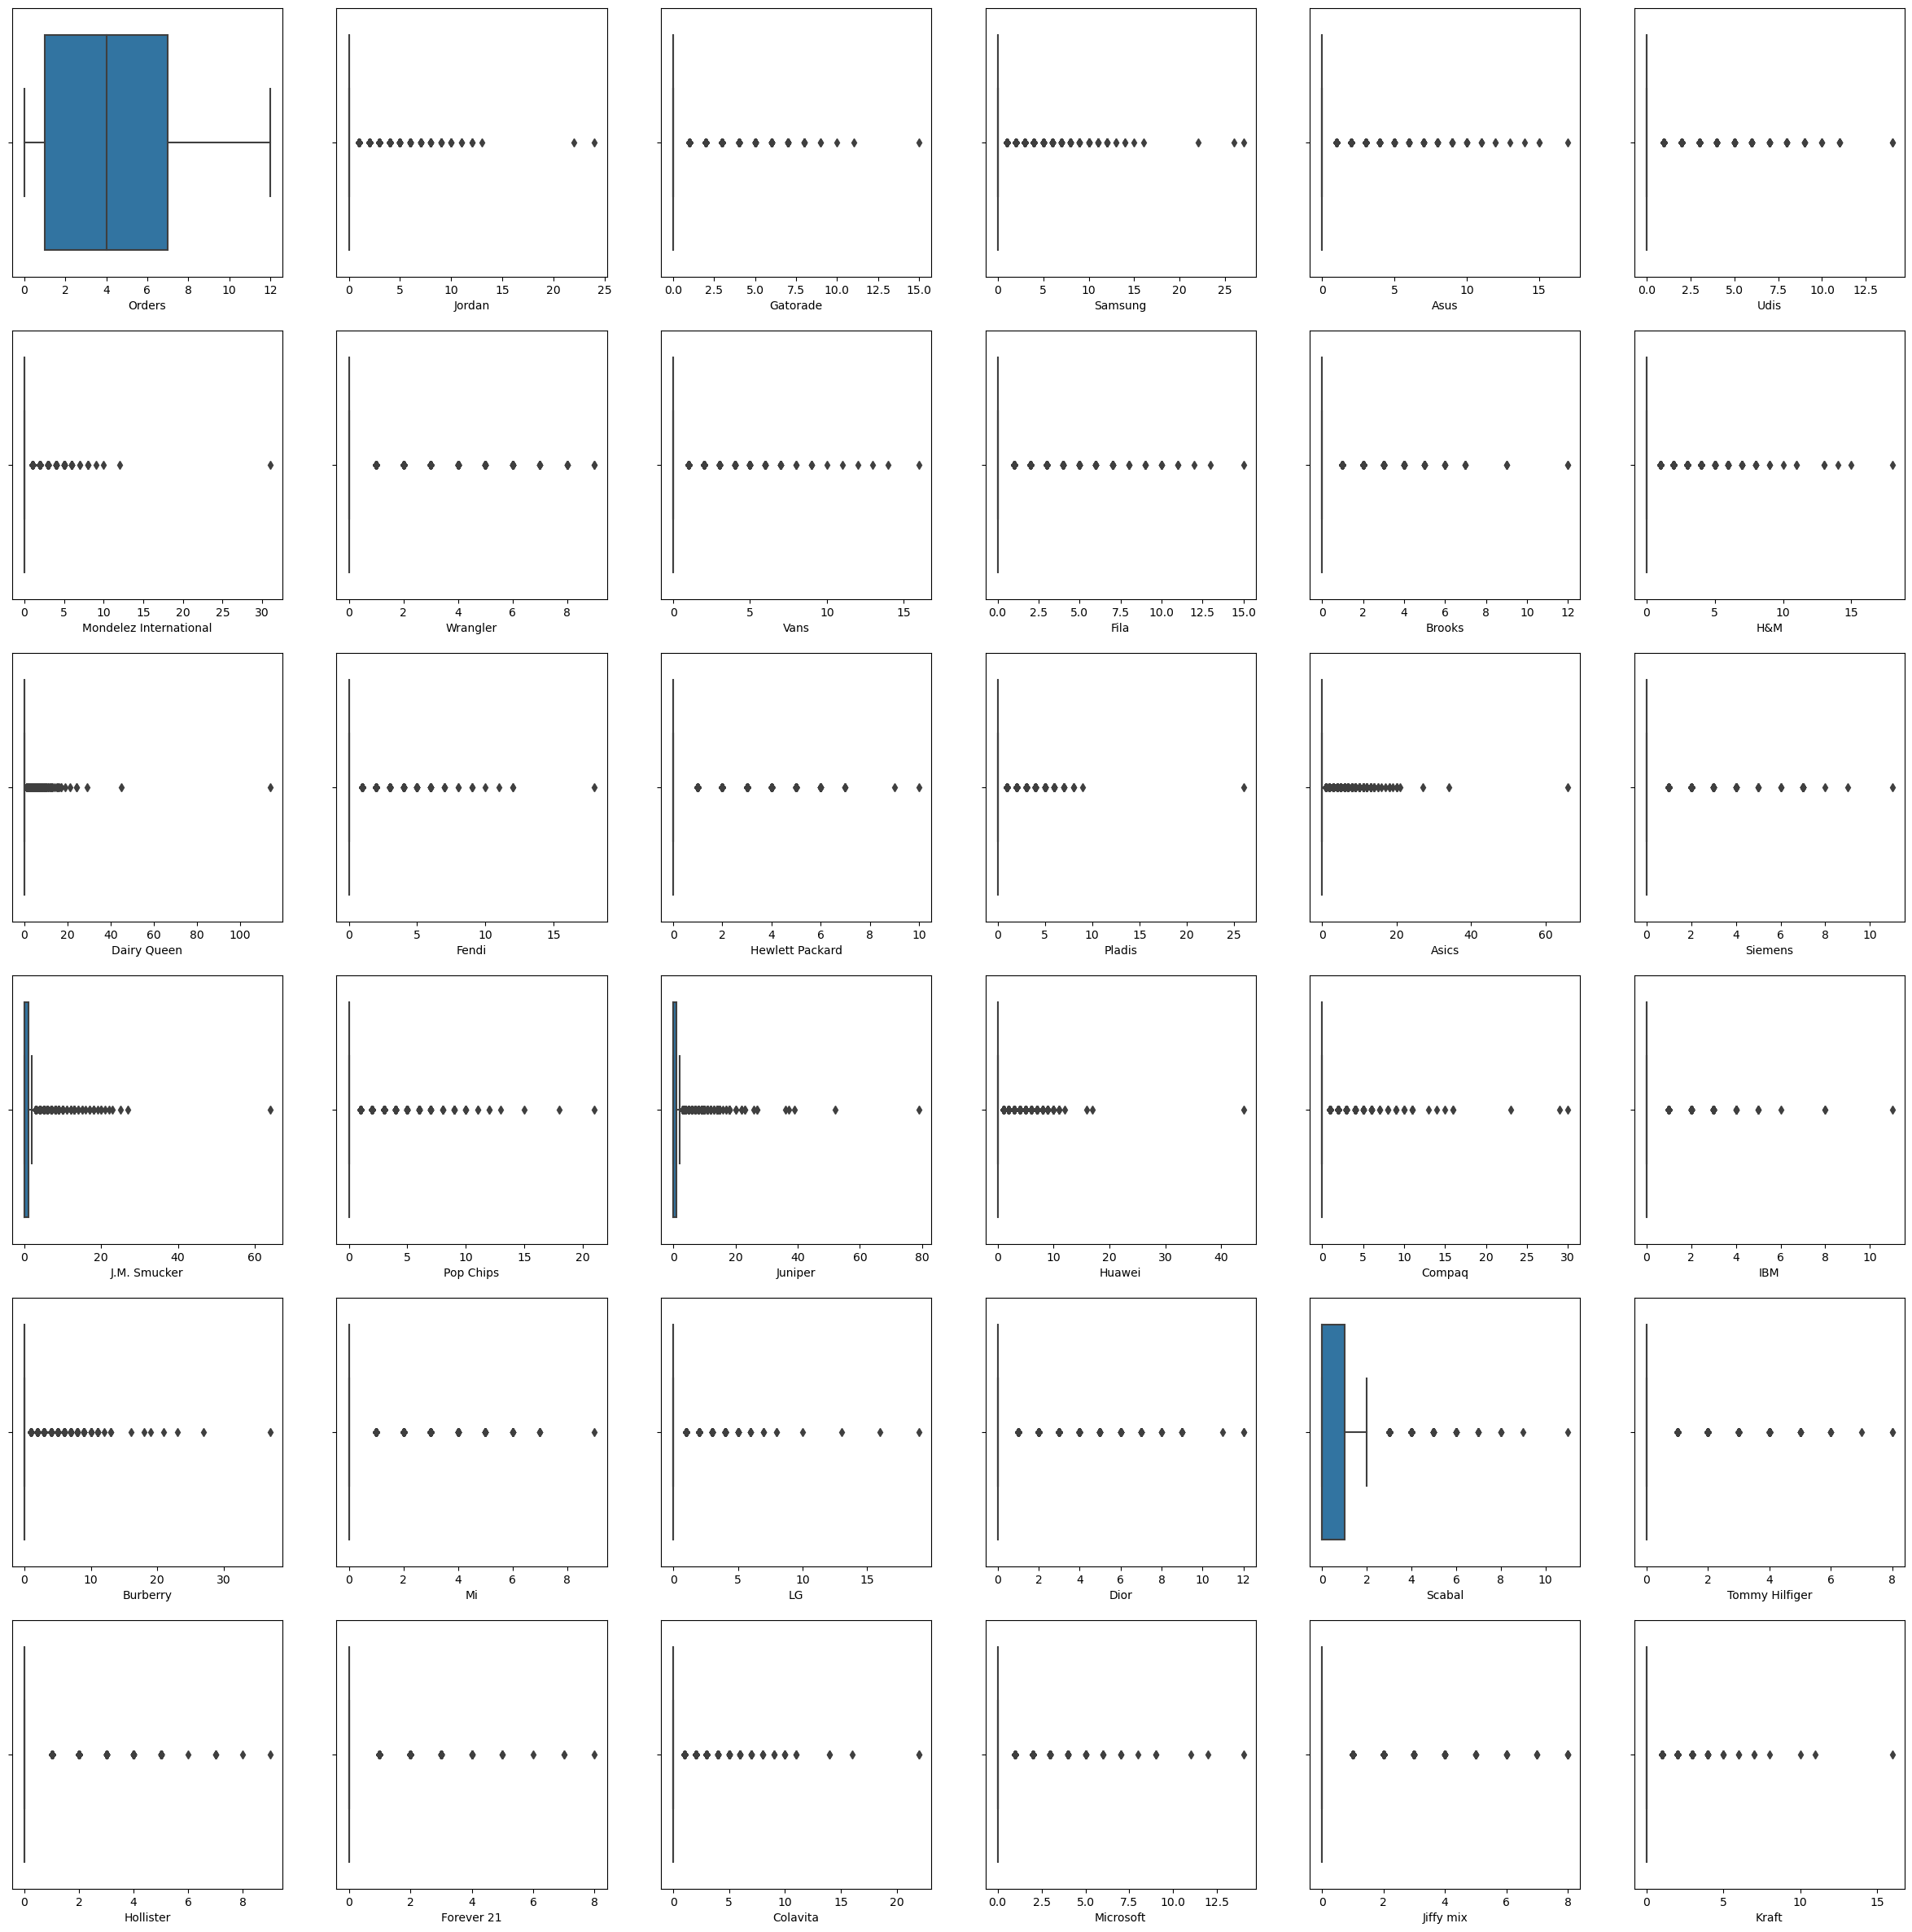

In [87]:
 #Boxplot for orders and searches of each brands
cols = list(data.columns[2:])
def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i,col in enumerate(lst,1):
        plt.subplot(6,6,i)
        sns.boxplot(data=data,x=data[col])    
dist_list(cols)

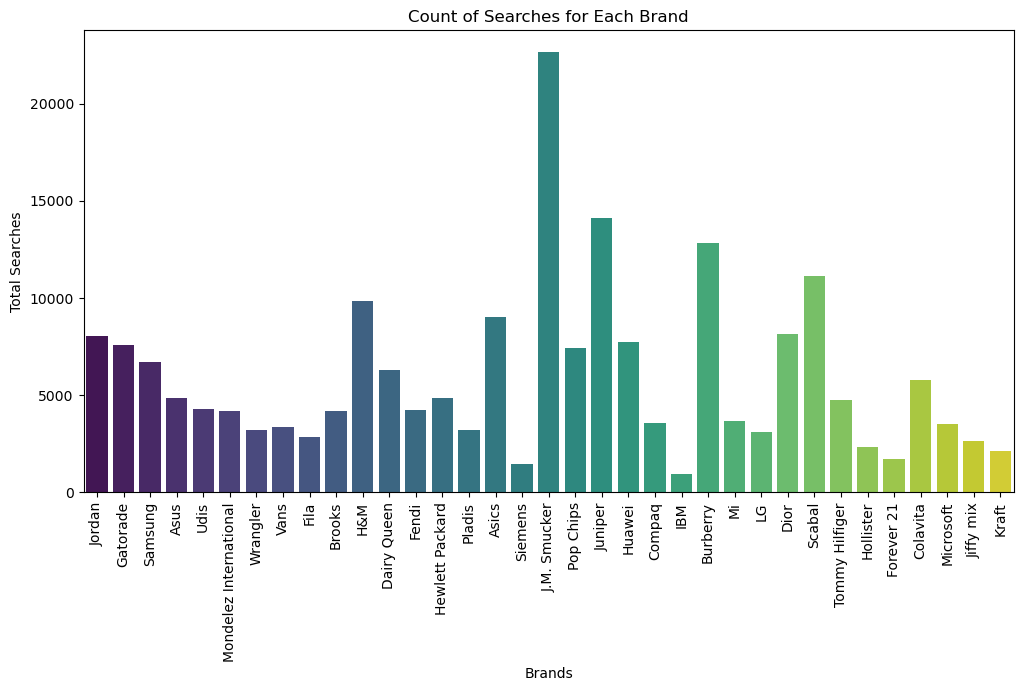

In [88]:
brand_counts = data.iloc[:, 3:].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Total Searches')
plt.title('Count of Searches for Each Brand')
plt.show()

* maximum people orders more item from J.M.Smucker

## Model Building

In [98]:
from sklearn.cluster import KMeans

X = data.iloc[:, 2:] 

In [99]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=200, random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

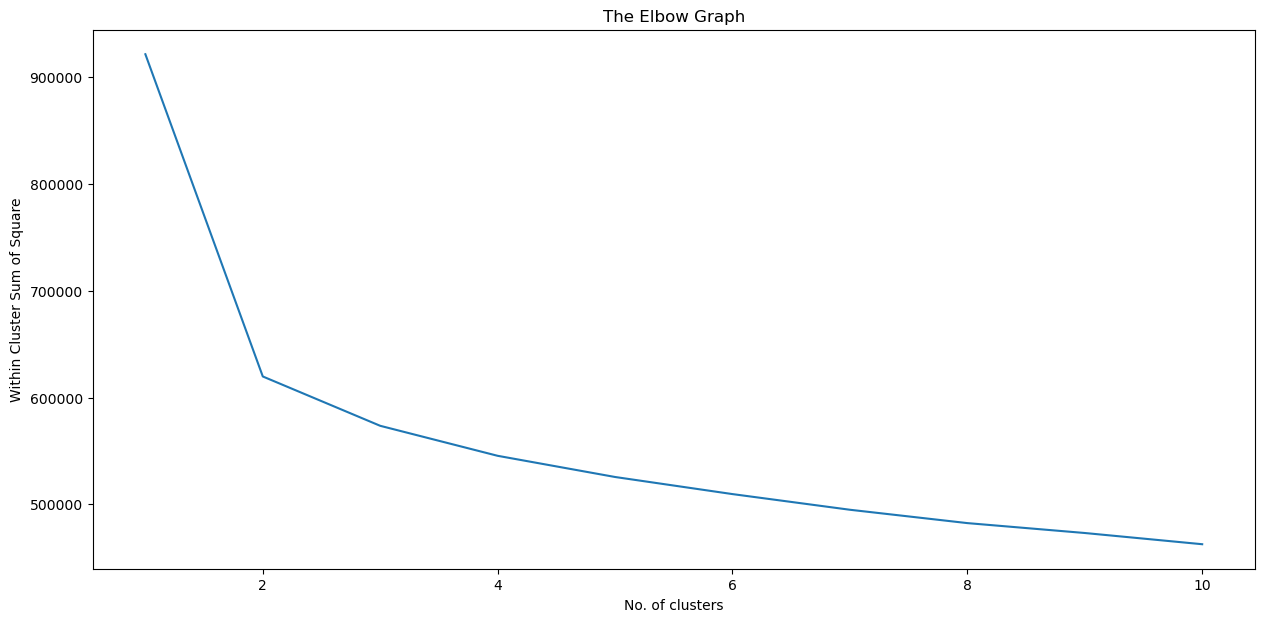

In [100]:
plt.figure(figsize = (15, 7))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
for i in range(2,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(X)
 
 score = silhouette_score(X, kmeans.labels_, metric='euclidean')
 print(f'for cluster: {i} --> Silhouette Score: %.3f' % score)

for cluster: 2 --> Silhouette Score: 0.338
for cluster: 3 --> Silhouette Score: 0.203
for cluster: 4 --> Silhouette Score: 0.201
for cluster: 5 --> Silhouette Score: 0.204
for cluster: 6 --> Silhouette Score: 0.131
for cluster: 7 --> Silhouette Score: 0.132
for cluster: 8 --> Silhouette Score: 0.152
for cluster: 9 --> Silhouette Score: 0.133
for cluster: 10 --> Silhouette Score: 0.154


* We should consider the K=2 based on the Elbow Curve and Silhouttee Score

In [103]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, random_state = 42)

In [109]:
kmeans.cluster_centers_

array([[1.36271771, 0.25756405, 0.23491648, 0.21119895, 0.1515782 ,
        0.13903584, 0.13600428, 0.1056292 , 0.1075908 , 0.09790168,
        0.13642038, 0.30743625, 0.21440885, 0.13564763, 0.15692802,
        0.10794745, 0.28330262, 0.04559234, 0.72614872, 0.2422279 ,
        0.46822802, 0.25209535, 0.1154372 , 0.0341794 , 0.41675088,
        0.11834988, 0.10705582, 0.26624264, 0.35790287, 0.15740355,
        0.07769126, 0.05861024, 0.19021578, 0.111514  , 0.08595375,
        0.07358973, 0.88592998],
       [7.75358579, 0.28003339, 0.27456933, 0.23791455, 0.17378766,
        0.14927525, 0.14457008, 0.10859832, 0.11633908, 0.08962586,
        0.14487364, 0.35470896, 0.20285346, 0.1488958 , 0.16642635,
        0.10374137, 0.32184868, 0.05122562, 0.79137892, 0.25514153,
        0.47415952, 0.26553844, 0.12301738, 0.02914169, 0.44243758,
        0.12514229, 0.09675951, 0.27737725, 0.38559611, 0.16096228,
        0.07763527, 0.05570312, 0.19473325, 0.12256204, 0.09068832,
        0.06746

In [105]:
data['Cluster'] = kmeans.fit_predict(X)

In [106]:
cluster_stats = data.groupby('Cluster').describe()
cluster_stats

Cust_ID                                                            \
           count          mean          std  min     25%      50%      75%   
Cluster                                                                      
0        16823.0  14808.684658  8663.123776  2.0  7259.0  14707.0  22347.5   
1        13177.0  15245.389542  8651.067073  1.0  7854.0  15328.0  22695.0   

                   Orders            ... Jiffy mix         Kraft            \
             max    count      mean  ...       75%  max    count      mean   
Cluster                              ...                                     
0        30000.0  16823.0  1.362718  ...       0.0  8.0  16823.0  0.073590   
1        29993.0  13177.0  7.753586  ...       0.0  8.0  13177.0  0.067466   

                                             
              std  min  25%  50%  75%   max  
Cluster                                      
0        0.380766  0.0  0.0  0.0  0.0   6.0  
1        0.396844  0.0  0.0  0.0  0.0  16.0  

[2 rows x 296 columns]

<AxesSubplot:xlabel='Cluster', ylabel='Orders'>

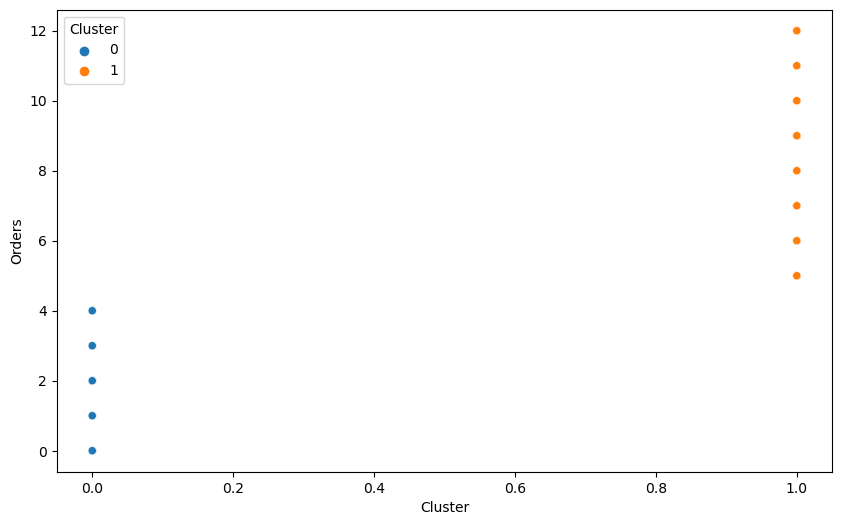

In [116]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cluster', y='Orders', hue='Cluster', data=data)



* The dataset reveals a clear segmentation into two customer groups: one characterized by smaller order quantities and another one has larger order quantities

In [117]:
cluster_labels = {0: 'Low-Volume Customer', 1: 'High-Volume Customers'}

data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

print(data[['Cust_ID', 'Cluster', 'Cluster_Label']].head())

   Cust_ID  Cluster          Cluster_Label
0        1        1  High-Volume Customers
1        2        0    Low-Volume Customer
2        3        1  High-Volume Customers
3        4        0    Low-Volume Customer
4        5        1  High-Volume Customers


In [118]:
cluster_labels

{0: 'Low-Volume Customer', 1: 'High-Volume Customers'}

## Model Interpretation


##### The segmentation model has successfully identified two distinct customer segments:

###### Low-Volume Customers:
* This group consists of customers who place smaller orders.

##### High-Volume Customers:
* This group consists of customers who place larger orders.They purchase higher quantites from all brands